# Lunar Lander 
#### RL Project

- Blasone Valentina
- Marchiori Pietrosanti Giulia

In [1]:
from utils import discretize_space_uniform, moving_avg
import Models.Random as Random
import Models.Sarsa as Sarsa
import Models.Q_learning as Q_learning
import Models.Q_learning_ANN as Q_ann
import Models.DQN as DQN

import matplotlib.pyplot as plt
import gym
env = gym.make("LunarLander-v2")

In [2]:
alpha = 0.01
gamma = 0.99
episodes = 2000

### Random algorithm

In [3]:
# Random
env = gym.make("LunarLander-v2")
rew_random = Random.random(env, episodes)
mean_rew_random = moving_avg(rew_random, window=100)

# Sarsa and Q-learning with discretization

### Discretization

In [4]:
n_bins = (6, 4, 4, 4, 4, 4, 2, 2)

x_space = discretize_space_uniform(-1.5, 1.5, n_bins[0])
y_space = discretize_space_uniform(0, 2, n_bins[1])
vx_space = discretize_space_uniform(-2, 2, n_bins[2])
vy_space = discretize_space_uniform(-2, 0.5, n_bins[3])
theta_space = discretize_space_uniform(-3, 3, n_bins[4])
omega_space = discretize_space_uniform(-1, 1, n_bins[5])

discretization = [x_space, y_space, vx_space, vy_space, theta_space, omega_space]

In [5]:
# Sarsa
env = gym.make("LunarLander-v2")
rew_sarsa = Sarsa.sarsa(env, discretization, alpha, gamma, episodes)
mean_rew_sarsa = moving_avg(rew_sarsa, window=100)

# Q-learning
env = gym.make("LunarLander-v2")
rew_ql = Q_learning.q_learning(env, discretization, alpha, gamma, episodes)
mean_rew_ql = moving_avg(rew_ql, window=100)

Episode 1999	Average Reward: -38.93

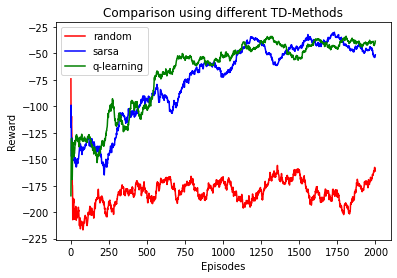

In [6]:
plt.plot(mean_rew_random, color="red", label="random")
plt.plot(mean_rew_sarsa, color="blue", label="sarsa")
plt.plot(mean_rew_ql, color="green", label="q-learning")
plt.title("Comparison using different TD-Methods")
plt.xlabel("Episodes")
plt.ylabel("Reward")
plt.legend()
plt.show()

# Q-learning with function approximation

In [7]:
# Q-learning with value approximation
env = gym.make("LunarLander-v2")
rew_ql_ann = Q_ann.q_learning_ANN(env, 8, episodes)
mean_rew_ann = moving_avg(rew_ql_ann, window=100)

Episode 0	Average Reward: -216.69
Episode 100	Average Reward: -153.48
Episode 200	Average Reward: -149.71
Episode 300	Average Reward: -153.71
Episode 400	Average Reward: -152.04
Episode 500	Average Reward: -159.18
Episode 600	Average Reward: -149.06
Episode 700	Average Reward: -145.03
Episode 800	Average Reward: -151.55
Episode 900	Average Reward: -138.93
Episode 1000	Average Reward: -145.19
Episode 1100	Average Reward: -142.48
Episode 1200	Average Reward: -133.03
Episode 1300	Average Reward: -138.61
Episode 1400	Average Reward: -147.30
Episode 1500	Average Reward: -134.98
Episode 1600	Average Reward: -141.31
Episode 1700	Average Reward: -147.30
Episode 1800	Average Reward: -137.16
Episode 1900	Average Reward: -136.23
Episode 1999	Average Reward: -135.90

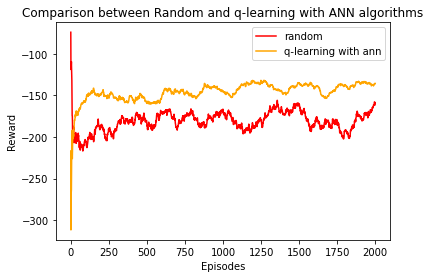

In [12]:
plt.plot(mean_rew_random, color="red", label="random")
plt.plot(mean_rew_ann, color="orange", label="q-learning with ann")
plt.title("Comparison between Random and q-learning with ANN algorithms")
plt.xlabel("Episodes")
plt.ylabel("Reward")
plt.legend()
plt.show()

# DQN

In [9]:
# DQN
env = gym.make("LunarLander-v2")
rew_dqn = DQN.dqn(env, 8, episodes)
mean_rew_dqn = moving_avg(rew_dqn, window=100)

Episode 0	Average Reward: -248.58
Episode 100	Average Reward: -150.13
Episode 200	Average Reward: -40.473
Episode 300	Average Reward: -22.52
Episode 400	Average Reward: 109.78
Episode 500	Average Reward: 145.56
Episode 600	Average Reward: 179.09
Episode 700	Average Reward: 178.67
Episode 800	Average Reward: 188.51
Episode 833	Average Reward: 201.32
Environment solved in 733 episodes!	Average Score: 201.32
Episode 900	Average Reward: 178.46
Episode 1000	Average Reward: 143.61
Episode 1100	Average Reward: 208.39
Episode 1200	Average Reward: 232.45
Episode 1300	Average Reward: 246.43
Episode 1400	Average Reward: 254.24
Episode 1500	Average Reward: 249.03
Episode 1600	Average Reward: 261.18
Episode 1700	Average Reward: 257.54
Episode 1800	Average Reward: 254.86
Episode 1900	Average Reward: 259.19
Episode 1999	Average Reward: 261.11

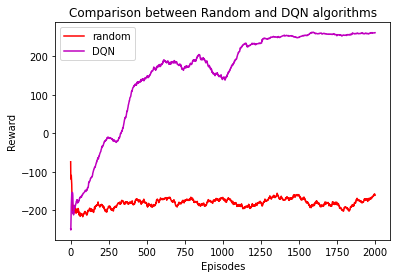

In [10]:
plt.plot(mean_rew_random, color="red", label="random")
plt.plot(mean_rew_dqn, color="m", label="DQN")
plt.title("Comparison between Random and DQN algorithms")
plt.xlabel("Episodes")
plt.ylabel("Reward")
plt.legend()
plt.show()

# Plot with all the used methods

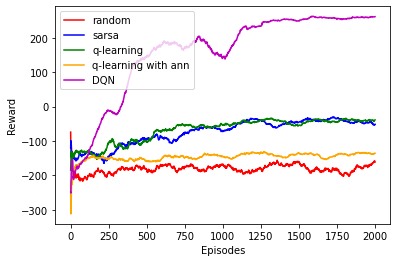

In [11]:
plt.plot(mean_rew_random, color="red", label="random")
plt.plot(mean_rew_sarsa, color="blue", label="sarsa")
plt.plot(mean_rew_ql, color="green", label="q-learning")
plt.plot(mean_rew_ann, color="orange", label="q-learning with ann")
plt.plot(mean_rew_dqn, color="m", label="DQN")
plt.xlabel("Episodes")
plt.ylabel("Reward")
plt.legend()
plt.show()